# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
# Lior Y. 8103
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
AI agent name: Chat-GPT (OpenAI)
Goal: Helped me improve my code to achieve higher accuracy and choose the best visualization for the project data

Prompt1:
    "Help me improve my training functions (train_linear_regression, train_knn, train_decision_tree) by adding all necessary hyperparameters to boost model accuracy"

Prompt2:
    "Help me refine my evaluate_models function to run K-fold CV on these training functions and select the model with the highest R²"

Prompt3:
    "Help me improve the test evaluation code to calculate Macro F1, accuracy, confusion matrix, and display it as a heatmap for clarity"

AI agent name 2: Gemini
Goal: Assisted me in presenting the data most effectively by selecting the most suitable visualization for the project

Prompt1:
    "Which visualization type should I use to display the confusion matrix and performance metrics for my wine quality model?"

Prompt2:
    "Help me improve the way I present the confusion matrix by suggesting a clearer, more informative heatmap visualization"

Prompt3:
    "Suggest additional visualizations to illustrate the model’s performance clearly (e.g., bar plots of metrics, residual plots)"
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
!pip install seaborn

In [3]:
# libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.metrics import r2_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [4]:
df = pd.read_csv(r"C:\Users\liory\Downloads\wine_data\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
X_train = pd.read_csv(r"C:\Users\liory\Downloads\wine_data\wine_train.csv")
X_test  = pd.read_csv(r"C:\Users\liory\Downloads\wine_data\wine_test.csv")

Y_train = X_train['target']
Y_test  = X_test['target']

X_train = X_train.drop(columns=['target'])
X_test  = X_test.drop(columns=['target'])

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test  shape:", X_test.shape)
print("Y_test  shape:", Y_test.shape)

display(X_train.head())
display(X_test.head())
display(Y_train.head())


X_train shape: (142, 13)
Y_train shape: (142,)
X_test  shape: (36, 13)
Y_test  shape: (36,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


0    1
1    2
2    1
3    1
4    2
Name: target, dtype: int64

In [6]:
df.describe().T.style.background_gradient(axis=0, cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


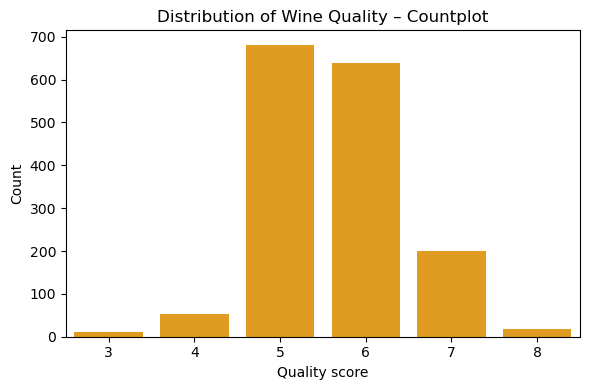

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, color='orange')
plt.title('Distribution of Wine Quality – Countplot')
plt.xlabel('Quality score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

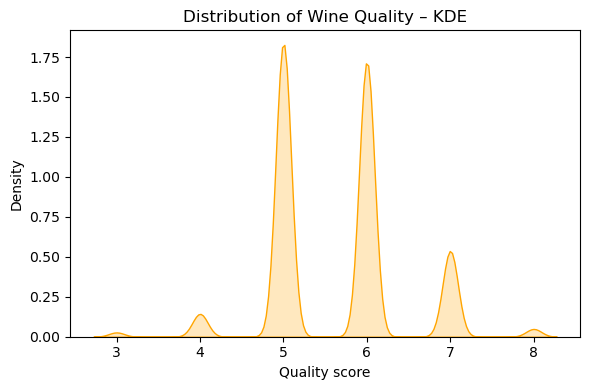

In [8]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['quality'], fill=True, bw_adjust=0.5, color='orange')
plt.title('Distribution of Wine Quality – KDE')
plt.xlabel('Quality score')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:
def train_linear_regression(
    X_train, y_train,
    degree: int = 1,
    interaction_only: bool = False,
    k: int | str = 'all',
    fit_intercept: bool = True,
    positive: bool = False
):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree,
                                    interaction_only=interaction_only,
                                    include_bias=False)),
        ('select', SelectKBest(score_func=f_regression, k=k)),
        ('reg', LinearRegression(fit_intercept=fit_intercept,
                                 positive=positive))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

In [10]:
def train_knn(
    X_train, y_train,
    n_neighbors: int = 5,
    weights: str = 'uniform',
    p: int = 2,
    algorithm: str = 'auto',
    leaf_size: int = 30
):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(
            n_neighbors=n_neighbors,
            weights=weights,
            metric='minkowski',
            p=p,
            algorithm=algorithm,
            leaf_size=leaf_size
        ))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline

In [11]:
def train_decision_tree(
    X_train, y_train,
    criterion: str = 'squared_error',
    max_depth: int | None = None,
    min_samples_split: int = 2,
    min_samples_leaf: int = 1,
    max_features: int | float | str | None = None,
    random_state: int = 42
):

    model = DecisionTreeRegressor(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )
    model.fit(X_train, y_train)
    return model

In [12]:
def evaluate_models(
    train_funcs: dict[str, callable],
    param_grids: dict[str, dict],
    X: pd.DataFrame,
    y: pd.Series,
    cv: int = 5,
    scoring = r2_score
) -> tuple[pd.DataFrame, str, dict, object, float]:
    
    records = []
    best_score = -np.inf
    best_name = None
    best_params = None
    best_model = None

    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for name, train_func in train_funcs.items():
        print(f"\n>>> Model: {name}")
        for params in ParameterGrid(param_grids[name]):
            fold_scores = []
            failed = False

            for train_idx, val_idx in kf.split(X):
                X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
                y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

                try:
                    model = train_func(X_tr, y_tr, **params)
                    y_pred = model.predict(X_val)
                except Exception as e:
                    print(f" Error in {name} with params={params}: {e}")
                    failed = True
                    break

                fold_scores.append(scoring(y_val, y_pred))

            if failed:
                continue 

            mean_score = np.mean(fold_scores)
            records.append({
                'model': name,
                'params': params,
                'mean_score': mean_score
            })
            print(f"  params={params} → mean_{scoring.__name__}={mean_score:.4f}")

            if mean_score > best_score:
                best_score = mean_score
                best_name = name
                best_params = params
                best_model = train_func(X, y, **params)

    results_df = pd.DataFrame(records)
    print(f"\nBest model: {best_name}")
    print(f"   params: {best_params}")
    print(f"   {scoring.__name__}={best_score:.4f}")

    return results_df, best_name, best_params, best_model, best_score


In [13]:
train_funcs = {
    'LinReg': train_linear_regression,
    'KNN':    train_knn,
    'DT':     train_decision_tree
}

param_grids = {
    'LinReg': {
        'degree':           [1, 2, 3],
        'interaction_only': [False, True],
        'k':                ['all', 5, 10],
        'fit_intercept':    [True, False],
        'positive':         [False, True]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights':     ['uniform', 'distance'],
        'p':           [1, 2],
        'algorithm': ['kd_tree', 'ball_tree', 'brute'],
        'leaf_size':   [20, 30]
    },
    'DT': {
        'criterion':         ['squared_error', 'absolute_error'],
        'max_depth':         [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf':  [1, 3, 5],
        'max_features':      [None, 'sqrt']
    }
}

results_df, best_name, best_params, best_model, best_score = evaluate_models(
    train_funcs, param_grids, X_train, Y_train, cv=5
)

print("All results:")
print(results_df.sort_values('mean_score', ascending=False).head())

print(f"\n the best: {best_name}")
print(f"params: {best_params}")
print(f"R2: {best_score:.4f}")

if best_name == 'KNN':
    p_val = best_params.get('p')              
    n = best_params.get('n_neighbors')        
    if p_val == 1:
        metric = 'Manhattan'
    elif p_val == 2:
        metric = 'Euclidean'
    else:
        metric = f'p={p_val}'
    print(f"Distance metric: {metric}, n_neighbors = {n}")
    print("\n")
    print("\n")



>>> Model: LinReg
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': False, 'k': 'all', 'positive': False} → mean_r2_score=0.8480
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': False, 'k': 'all', 'positive': True} → mean_r2_score=0.3163
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': False, 'k': 5, 'positive': False} → mean_r2_score=0.8106
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': False, 'k': 5, 'positive': True} → mean_r2_score=-0.0721
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': False, 'k': 10, 'positive': False} → mean_r2_score=0.8252
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': False, 'k': 10, 'positive': True} → mean_r2_score=0.2923
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': True, 'k': 'all', 'positive': False} → mean_r2_score=0.8480
  params={'degree': 1, 'fit_intercept': True, 'interaction_only': True, 'k': 'all', 'positive': True} → mean_

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\liory\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\liory\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\liory\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\liory\anaconda3\Lib\encodings\cp1255.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x8c in position 24: character maps to <undefined>
C:\Users\liory\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of log

  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'} → mean_r2_score=0.9463
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'} → mean_r2_score=0.9472
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'} → mean_r2_score=0.9196
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'} → mean_r2_score=0.9204
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} → mean_r2_score=0.9422
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} → mean_r2_score=0.9440
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'} → mean_r2_score=0.9297
  params={'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'} → mean_r2_score=0.9306
  params={'algorithm': 'brute', 'lea

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
def retrain_best_model(
    train_funcs: dict[str, callable],
    best_name: str,
    best_params: dict,
    X_train, y_train
):

    print(f"Retraining model '{best_name}' with parameters: {best_params}")
    final_model = train_funcs[best_name](X_train, y_train, **best_params)
    return final_model


In [15]:
train_funcs = {
    'LinReg': train_linear_regression,
    'KNN':    train_knn,
    'DT':     train_decision_tree
}

if best_name == 'KNN':
    p_val = best_params.get('p')
    n     = best_params.get('n_neighbors')

    p_str = str(p_val).lower()
    if p_val == 1 or p_str == 'manhattan':
        metric = 'Manhattan'
    elif p_val == 2 or p_str == 'euclidean':
        metric = 'Euclidean'
    else:
        metric = f'p={p_val}'

    print(f"Distance metric: {metric}, n_neighbors = {n}")

final_model = retrain_best_model(
    train_funcs,
    best_name,
    best_params,
    X_train,
    Y_train    
)


Distance metric: Manhattan, n_neighbors = 7
Retraining model 'KNN' with parameters: {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


## Part 5 - Apply on test and show model performance estimation

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg',    LinearRegression())
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

comparison = pd.DataFrame({
    'Predicted': y_pred,
    'Actual':    Y_test.values
})
comparison['Correct'] = comparison['Predicted'] == comparison['Actual']
print(comparison.head(5))

scaler = StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm  = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)
knn.fit(X_train_norm, Y_train)

y_pred_knn = knn.predict(X_test_norm)

comparison_knn = pd.DataFrame({
    'Predicted': y_pred_knn,
    'Actual':    Y_test.values
})
comparison_knn['Correct'] = comparison_knn['Predicted'] == comparison_knn['Actual']
print(comparison_knn.head(5))


   Predicted  Actual  Correct
0   2.104399       2    False
1   0.181117       0    False
2   2.069420       2    False
3   0.941469       1    False
4   1.935564       2    False
   Predicted  Actual  Correct
0        2.0       2     True
1        0.0       0     True
2        2.0       2     True
3        1.0       1     True
4        2.0       2     True


In [17]:
y_unique_lst = sorted(pd.Series(Y_test).unique())

y_pred_cont = final_model.predict(X_test)
min_label, max_label = y_unique_lst[0], y_unique_lst[-1]
y_pred = (
    np.rint(y_pred_cont)
      .astype(int)
      .clip(min_label, max_label)
)

macro_f1 = f1_score(Y_test, y_pred, average='macro')
accuracy = accuracy_score(Y_test, y_pred)

conf_mat = confusion_matrix(Y_test, y_pred, labels=y_unique_lst)
conf_matrix_df = pd.DataFrame(
    conf_mat,
    index=["True {l}" for l in y_unique_lst],
    columns=["Pred {l}" for l in y_unique_lst]
)

print("Mean Macro F1 Score: {macro_f1:.4f}")
print("Accuracy:            {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(Y_test, y_pred, labels=y_unique_lst, target_names=[str(l) for l in y_unique_lst]))

print("\nConfusion Matrix:")
print(conf_matrix_df)


Mean Macro F1 Score: {macro_f1:.4f}
Accuracy:            {accuracy:.4f}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Confusion Matrix:
          Pred {l}  Pred {l}  Pred {l}
True {l}        11         0         0
True {l}         0        13         1
True {l}         0         0        11
